#Objective
Use transfer learning to improve the accuracy of the CIFAR10 dataset. The purpose is to get experience using pretrained models.
##1. Load the CIFAR10 dataset, set up our model

In [1]:
from tensorflow.keras.datasets import cifar10

# Loads the cifar10 dataset
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


So first things first, let's look at the shape of our data:

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Let's take a look at a random image for fun.

[4]


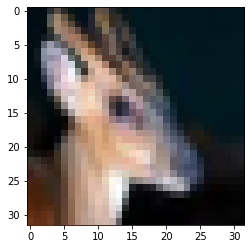

In [3]:
import numpy as np
import matplotlib.pyplot as plt

random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])
print(y_train[random_num])

Looking at the dataset's webpage, the list is all uint8s, we gotta change that to floats and then norm the data to make it work simpler. 

In [4]:
img_rows = x_train[0].shape[0] #we're gonna need this later, I just know it. 
img_cols = x_train[0].shape[1]

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0


Again on the theme of making things move smoother, let's one-hot encode the labels.

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Alright, it's time to set up the network. 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
import tensorflow as tf

input_shape = x_test[0].shape
#init the model
model = Sequential()

#First convolutional layer, using padding ='same' to maintain the output shape
model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
#first Activation layer
model.add(Activation('relu'))
#second convolutional layer
model.add(Conv2D(32, 3))
#second Activation layer
model.add(Activation('relu'))
#first pooling layer, using a kernel of 2,2
model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout layer
model.add(Dropout(0.5))
#third convolutional layer, using padding agin to maintain the output shape, but increasing the filters to 64
model.add(Conv2D(64, 3, padding ='same'))
#third activation layer
model.add(Activation('relu'))
#Fourth convolutional layer, same # of filters as the third
model.add(Conv2D(64, 3))
#fourth activation layer
model.add(Activation('relu'))
#second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#second dropout layer
model.add(Dropout(0.5))
#flatten layer
model.add(Flatten())
#dense layer
model.add(Dense(512))
#another activation layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

We got it right on the money, exactly what we want.
#2. The training montage

In [9]:
batch_size = 32
epochs = 10
from tensorflow.keras.callbacks import History

history = model.fit(x_train, y_train, batch_size, epochs, validation_data = (x_test, y_test)) #fit our model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 255s 163ms/step - loss: 1.2654 - accuracy: 0.5443 - val_loss: 1.1161 - val_accuracy: 0.6028
Epoch 2/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.2310 - accuracy: 0.5586 - val_loss: 1.1293 - val_accuracy: 0.5909
Epoch 3/10
1563/1563 [==============================] - 262s 167ms/step - loss: 1.2007 - accuracy: 0.5713 - val_loss: 1.0761 - val_accuracy: 0.6181
Epoch 4/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.1720 - accuracy: 0.5825 - val_loss: 1.0580 - val_accuracy: 0.6231
Epoch 5/10
1563/1563 [==============================] - 260s 166ms/step - loss: 1.1459 - accuracy: 0.5904 - val_loss: 1.0240 - val_accuracy: 0.6367
Epoch 6/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.1197 - accuracy: 0.6033 - val_loss: 1.0041 - val_accuracy: 0.6433
Epoch 7/10
1563/1563 [==============================] - 259s 165ms/step - loss: 1.0994 - accuracy: 0.6101 - val_

##3. Testing with some test images
We're gonna grab 5 and see what our model classifies it as.

9	5	8	1	8	

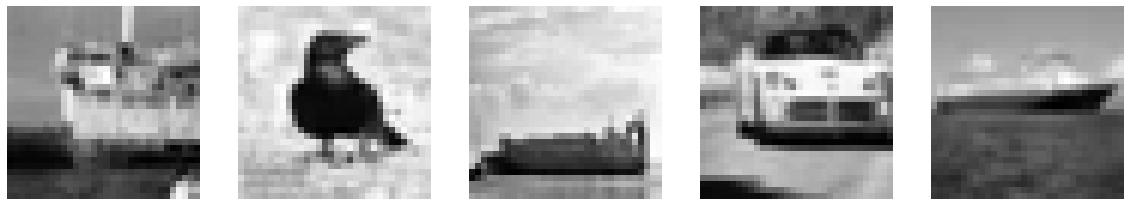

In [8]:
import numpy as np

figure = plt.figure(figsize=(20,20))
np.random.seed(2722)

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0),end="\t")

So in a breakdown:


*   The first image appears to be a ship, the model classified it as a 
*   List item



Saving the model because it takes forever to fit:

In [12]:
from tensorflow.keras.models import load_model
model.save('cfar10_deep_cnn_10_Epochs.h5')
print('model saved')

model saved
